In [1]:
                                        # User Analytics in the Telecommunication Industry # 


In [2]:
# Start The project By importing Important Libraries and uploading the Dataset  # 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import requests
from sklearn.model_selection import cross_val_score
from sklearn .impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances



In [4]:
# Uploading the Dataset Into The Terminal # 

In [5]:
user_data = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\NEXTHIKES PROJECT LIST\PROJECT 5\telcom_data.csv",)

In [6]:
user_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [7]:
# Data Preprocessing # 

In [8]:
print(user_data.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
user_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
user_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [11]:
 # checking for missing values and outliers in the datastet #

In [12]:
print(user_data.describe())  


          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893170e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917540e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349880e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349880e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304240e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318650e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

In [13]:
user_data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [14]:
#  fill missing categorical values with mode
user_data.fillna(user_data.mode().iloc[0], inplace=True)

In [15]:
#  rows with at least 80% of data
user_data.dropna(thresh=0.8 * len(user_data.columns), inplace=True)

In [16]:
user_data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [17]:
# After Cleaning the Dataset Lets Move to user overview # 

In [18]:
                                             #Task - 1 User Overview Analysis # 
# Understand user behaviour by analyzing handset usage and application activity#

In [19]:
# Handset Analysis #
# Top 10 most used handsets
# Top 3 handset manufacturers
# Top 5 handsets per top 3 manufacturers



In [20]:
# Identify the top 10 most used handsets #
top_10_handsets = user_data['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [21]:
# Identify the top 3 handset manufacturers #
user_data['Handset Manufacturer'] = user_data['Handset Type'].apply(lambda x: x.split()[0]) 
top_3_manufacturers = user_data['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34995
Name: count, dtype: int64


In [22]:
# Identify the top 5 handsets per top 3 manufacturers #
top_5_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_per_manufacturer[manufacturer] = user_data[user_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print(top_5_per_manufacturer)


{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  20324
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


In [23]:
# Recomendation To Marketing Team  # 
#Apple (Highest Sales Volume) -focus on maintaning brand loyalty ,leverage social media marketing etc
#Samsung (Second in Sales Volume)- strenthen mid- range and budget friendly heandset campaign .
# Huawei (Third in Sales Volume)-Explore partnerships with telecom providers to increase visibility and sales opportunities.
#Apple (iPhone 6S, 6, 7, SE, 8) - upgrade campaign , Brand loyalty Promotions etc 
#Samsung (Galaxy S8, A5, J5, J3, S7) - Feature Driven Promotion , Youth Market Trageting 
#Huawei (B528S, E5180, P20 Lite, P20, Y6) -competitive Pricing- Huawei models sell well due to affordability.
#Marketing should highlight cost-effective innovation.





In [24]:
# check for columns #
user_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [25]:
                                            # User Behaviour on Applications #

# Aggregate per user
# Number of xDR sessions
# Total session duration
#Total Download (DL) & Upload (UL) data
# Total data volume for each application (Social Media, Google, YouTube, etc.)


In [26]:
# Adding Columns in the Dataframe For Clear Total Output # 

user_data['Total_data DL+UL'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']
user_data['Social_Media DL+UL'] = user_data['Social Media DL (Bytes)']+user_data['Social Media UL (Bytes)']
user_data['Google_data DL+UL']= user_data['Google DL (Bytes)']+user_data['Google UL (Bytes)']
user_data['Email_data DL+UL']= user_data['Email DL (Bytes)']+user_data['Email UL (Bytes)']
user_data['Youtube_data DL+UL']= user_data['Youtube DL (Bytes)']+user_data['Youtube UL (Bytes)']
user_data['Netflix_data DL+UL']= user_data['Netflix DL (Bytes)']+user_data['Netflix UL (Bytes)']
user_data['Gaming_data DL+UL']= user_data['Gaming DL (Bytes)']+user_data['Gaming UL (Bytes)']
user_data['Other_data DL+UL']= user_data['Other DL (Bytes)']+user_data['Other UL (Bytes)']

In [27]:
user_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Total_data DL+UL,Social_Media DL+UL,Google_data DL+UL,Email_data DL+UL,Youtube_data DL+UL,Netflix_data DL+UL,Gaming_data DL+UL,Other_data DL+UL
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,36749741.0,308879636.0,345629377.0,1.570185e+06,2.905912e+06,3.701304e+06,18355943.00,17855187.00,2.924265e+08,1.805588e+08
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,707185356.0,1.933278e+06,4.414096e+06,9.373850e+05,39359124.00,35565545.00,6.099208e+08,5.419594e+08
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,307690973.0,1.726277e+06,1.022912e+07,3.363124e+06,34425237.00,23751202.00,2.299803e+08,4.149084e+08
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,889352748.0,6.574930e+05,1.181176e+07,2.070983e+06,36534765.00,15092588.00,8.103879e+08,7.618372e+08
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,607681403.0,9.127880e+05,7.748843e+06,2.110349e+06,34222253.00,17539799.00,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,57628851.0,574175259.0,631804110.0,3.517065e+06,1.278491e+07,6.908760e+05,27955095.00,37561864.00,5.358069e+08,1.675193e+07
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,39135081.0,666648844.0,705783925.0,2.352181e+06,4.415361e+06,2.121718e+06,22165518.00,40643294.00,6.316281e+08,7.146381e+08
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,34912224.0,592786405.0,627698629.0,1.260239e+06,6.585469e+06,2.058277e+06,24516413.00,15029702.00,5.669338e+08,1.324156e+08
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,29626096.0,371895920.0,401522016.0,8.231090e+05,7.757267e+06,2.850914e+06,17122508.00,16494842.00,3.550664e+08,8.161200e+08


In [28]:

#Group data by user (MSISDN) and aggregate required metrics #


user_behaviour = user_data.groupby("MSISDN/Number").agg({
"Bearer Id": "count",
    "Dur. (ms)":"sum",
    "Total_data DL+UL": "sum",
    "Social_Media DL+UL": "sum",
    "Google_data DL+UL":"sum",
    "Email_data DL+UL":"sum",
    "Youtube_data DL+UL":"sum",
    "Netflix_data DL+UL":"sum",
    "Gaming_data DL+UL":"sum",
    "Other_data DL+UL":"sum",
}).reset_index()


In [29]:
user_behaviour

,MSISDN/Number,Bearer Id,Dur. (ms),Total_data DL+UL,Social_Media DL+UL,Google_data DL+UL,Email_data DL+UL,Youtube_data DL+UL,Netflix_data DL+UL,Gaming_data DL+UL,Other_data DL+UL
0,3.360100e+10,1,116720.0,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,5.959665e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0
106852,3.379000e+10,1,140988.0,4.803073e+08,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0
106853,3.197021e+12,1,877385.0,2.321240e+08,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0
106854,3.370000e+14,1,253030.0,5.962878e+08,521566.0,9830617.0,3318582.0,36734940.0,30905042.0,5.101427e+08,149188439.0


In [30]:
# Save the aggregated data # 
user_behaviour.to_csv("user_behavior.csv", index=False)



In [31]:
print(user_behaviour.head())

   MSISDN/Number  Bearer Id  Dur. (ms)  Total_data DL+UL  Social_Media DL+UL  \
0   3.360100e+10          1   116720.0      8.786906e+08           2232135.0   
1   3.360100e+10          1   181230.0      1.568596e+08           2660565.0   
2   3.360100e+10          1   134969.0      5.959665e+08           3195623.0   
3   3.360101e+10          1    49878.0      4.223207e+08            280294.0   
4   3.360101e+10          2    37104.0      1.457411e+09           2912542.0   

   Google_data DL+UL  Email_data DL+UL  Youtube_data DL+UL  \
0          4389005.0         1331362.0          21624548.0   
1          5334863.0         3307781.0          12432223.0   
2          3443126.0         3205380.0          21333570.0   
3          9678493.0         2284670.0           6977321.0   
4         18499616.0         3305469.0          41533002.0   

   Netflix_data DL+UL  Gaming_data DL+UL  Other_data DL+UL  
0          27180981.0       8.124587e+08       386570872.0  
1          11221763.0   

In [32]:
                                     # Exploratory Data Analysis (EDA) # 

In [33]:
 # understand data distributions, relationships, and necessary transformations#

In [34]:
print(user_behaviour.describe())

       MSISDN/Number      Bearer Id     Dur. (ms)  Total_data DL+UL  \
count   1.068560e+05  106856.000000  1.068560e+05      1.068560e+05   
mean    4.511474e+10       1.403768  1.468459e+05      6.959346e+08   
std     2.889423e+12       3.408147  3.093566e+05      1.719198e+09   
min     3.360100e+10       1.000000  7.142000e+03      3.324901e+07   
25%     3.365088e+10       1.000000  7.130800e+04      3.585499e+08   
50%     3.366365e+10       1.000000  1.027400e+05      6.179231e+08   
75%     3.368344e+10       2.000000  1.727990e+05      8.574351e+08   
max     8.823971e+14    1084.000000  8.132472e+07      5.393136e+11   

       Social_Media DL+UL  Google_data DL+UL  Email_data DL+UL  \
count        1.068560e+05       1.068560e+05      1.068560e+05   
mean         2.566439e+06       1.095963e+07      3.171255e+06   
std          6.450486e+06       2.674840e+07      7.784726e+06   
min          1.563000e+03       4.033000e+04      1.817600e+04   
25%          1.211282e+06     

In [35]:
# Hnadle Missing Values # 

In [36]:
user_behaviour.isnull().sum()

MSISDN/Number         0
Bearer Id             0
Dur. (ms)             0
Total_data DL+UL      0
Social_Media DL+UL    0
Google_data DL+UL     0
Email_data DL+UL      0
Youtube_data DL+UL    0
Netflix_data DL+UL    0
Gaming_data DL+UL     0
Other_data DL+UL      0
dtype: int64

In [37]:
                                      #  Univariate & Bivariate Analysis # 
                                     # statistics like mean, median, variance # 


In [38]:
user_behaviour.mean()

MSISDN/Number         4.511474e+10
Bearer Id             1.403768e+00
Dur. (ms)             1.468459e+05
Total_data DL+UL      6.959346e+08
Social_Media DL+UL    2.566439e+06
Google_data DL+UL     1.095963e+07
Email_data DL+UL      3.171255e+06
Youtube_data DL+UL    3.178619e+07
Netflix_data DL+UL    3.176531e+07
Gaming_data DL+UL     6.040877e+08
Other_data DL+UL      6.027292e+08
dtype: float64

In [39]:
user_behaviour.mode

<bound method DataFrame.mode of         MSISDN/Number  Bearer Id  Dur. (ms)  Total_data DL+UL  \
0        3.360100e+10          1   116720.0      8.786906e+08   
1        3.360100e+10          1   181230.0      1.568596e+08   
2        3.360100e+10          1   134969.0      5.959665e+08   
3        3.360101e+10          1    49878.0      4.223207e+08   
4        3.360101e+10          2    37104.0      1.457411e+09   
...               ...        ...        ...               ...   
106851   3.379000e+10          1     8810.0      7.146416e+08   
106852   3.379000e+10          1   140988.0      4.803073e+08   
106853   3.197021e+12          1   877385.0      2.321240e+08   
106854   3.370000e+14          1   253030.0      5.962878e+08   
106855   8.823971e+14          1   869844.0      1.391536e+08   

        Social_Media DL+UL  Google_data DL+UL  Email_data DL+UL  \
0                2232135.0          4389005.0         1331362.0   
1                2660565.0          5334863.0        

In [40]:
user_behaviour.std()

MSISDN/Number         2.889423e+12
Bearer Id             3.408147e+00
Dur. (ms)             3.093566e+05
Total_data DL+UL      1.719198e+09
Social_Media DL+UL    6.450486e+06
Google_data DL+UL     2.674840e+07
Email_data DL+UL      7.784726e+06
Youtube_data DL+UL    7.844921e+07
Netflix_data DL+UL    7.805827e+07
Gaming_data DL+UL     1.499676e+09
Other_data DL+UL      1.472667e+09
dtype: float64

In [41]:
user_behaviour.median()

MSISDN/Number         3.366365e+10
Bearer Id             1.000000e+00
Dur. (ms)             1.027400e+05
Total_data DL+UL      6.179231e+08
Social_Media DL+UL    2.303756e+06
Google_data DL+UL     9.586153e+06
Email_data DL+UL      2.799824e+06
Youtube_data DL+UL    2.680038e+07
Netflix_data DL+UL    2.671889e+07
Gaming_data DL+UL     5.423492e+08
Other_data DL+UL      5.398323e+08
dtype: float64

In [42]:
# calaculate Total Data Volume # 

user_behaviour['Total Data Volume'] = (user_behaviour['Total_data DL+UL'] )


In [43]:
                                               # Histogram of Total Data Volume # 

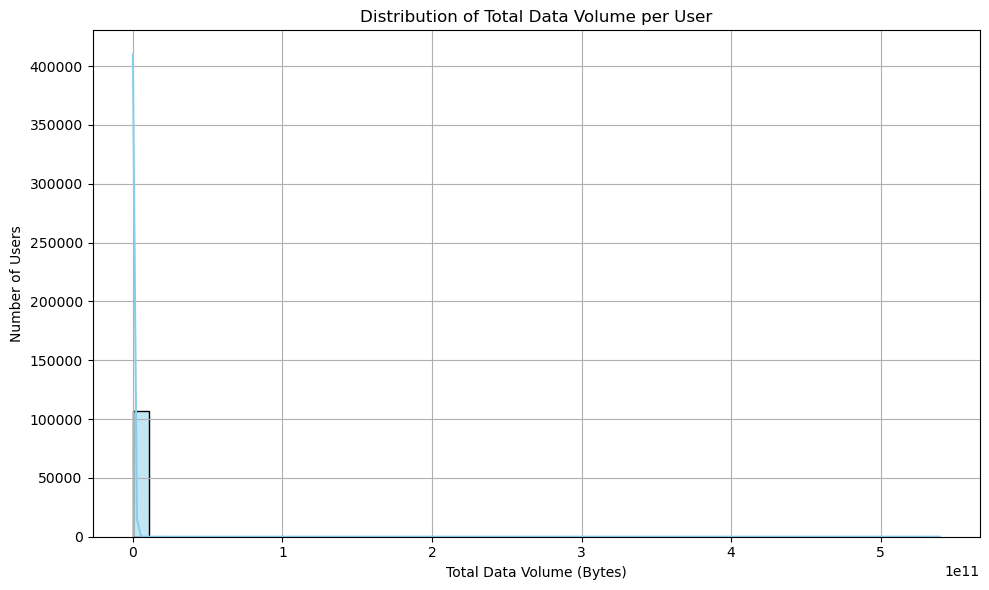

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(user_behaviour['Total Data Volume'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Data Volume per User')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Interpretation #
# Most of the data volume is concentrated at the lower end of the spectrum (left side of the histogram).
# A long tail to the right indicates a few users consume significantly more data than the rest.
# Most Users Use Low-to-Moderate Data 
# Presence of Heavy Data Users
# The long right tail highlights data-hungry users — possibly using video streaming, gaming, or file downloads.
# KDE Curve Insights 
# The smooth KDE line helps to identify how the usage gradually declines as data volume increases.
# high disparity in usage patterns.


In [46]:
                                         # Histogram of session duration #   
  

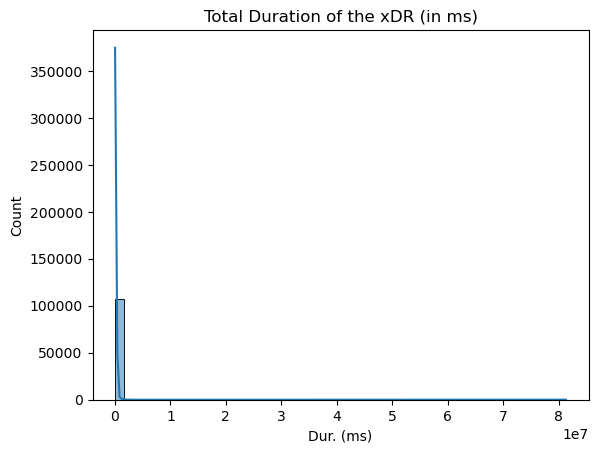

In [47]:
sns.histplot(user_behaviour["Dur. (ms)"], bins=50, kde=True)  
plt.title("Total Duration of the xDR (in ms)")  
plt.show()

In [48]:
# Interpretation #
# most of the bars are concentrated near the left side, with a long tail stretching to the right
#This is a right-skewed or positively skewed distribution.
# It indicates that most sessions are short.
# but a few sessions last significantly longer.

In [49]:
                                        #Barplot of Average Session Duration per User # 

In [50]:
avg_duration = user_behaviour[['MSISDN/Number', 'Dur. (ms)']].copy()
avg_duration['Avg Duration (s)'] = avg_duration['Dur. (ms)'] / 1000

top_users = avg_duration.sort_values(by='Avg Duration (s)', ascending=False).head(20)




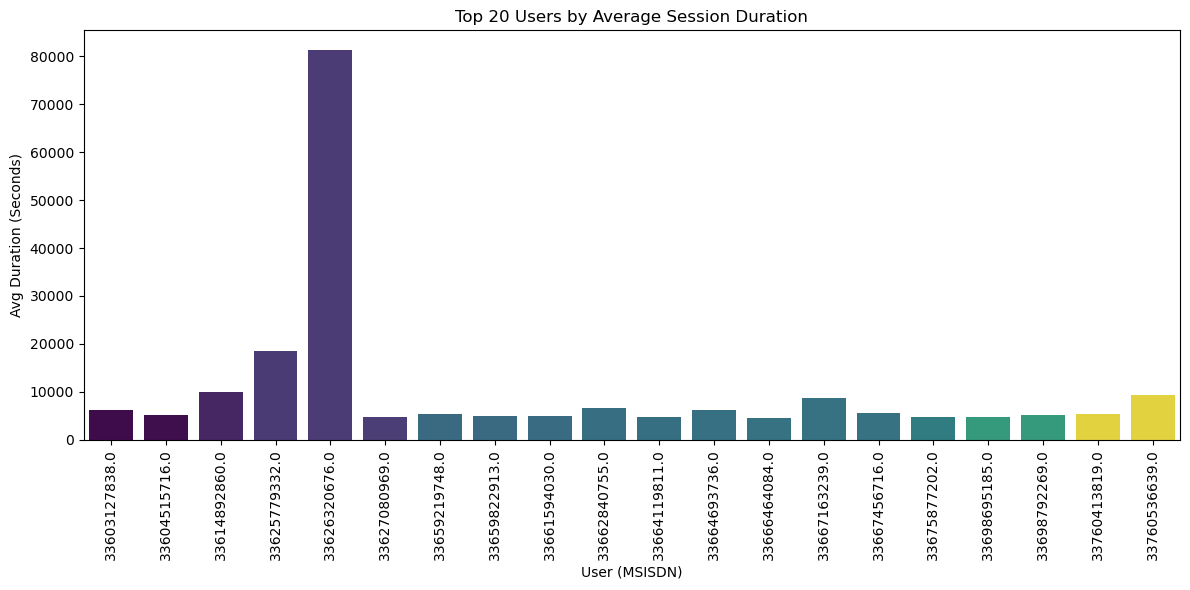

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_users,
    x='MSISDN/Number',
    y='Avg Duration (s)',
    hue='MSISDN/Number',
    palette='viridis',
    dodge=False,                   
    legend=False )                
plt.title('Top 20 Users by Average Session Duration')
plt.xticks(rotation=90)
plt.xlabel('User (MSISDN)')
plt.ylabel('Avg Duration (Seconds)')
plt.tight_layout()
plt.show()


In [52]:
# Interpretation #
# Thre is a  High Variation Among Users
# Users with Longer Sessions tallest bars represent users who spend the most time per session. 
#Users with Shorter Sessions,They may not consume as much data overall but are still actively engaging with the network.
#Users with shorter bars likely have quick, frequent sessions 

In [53]:
                                         # Boxplots to Visualize Outliers #

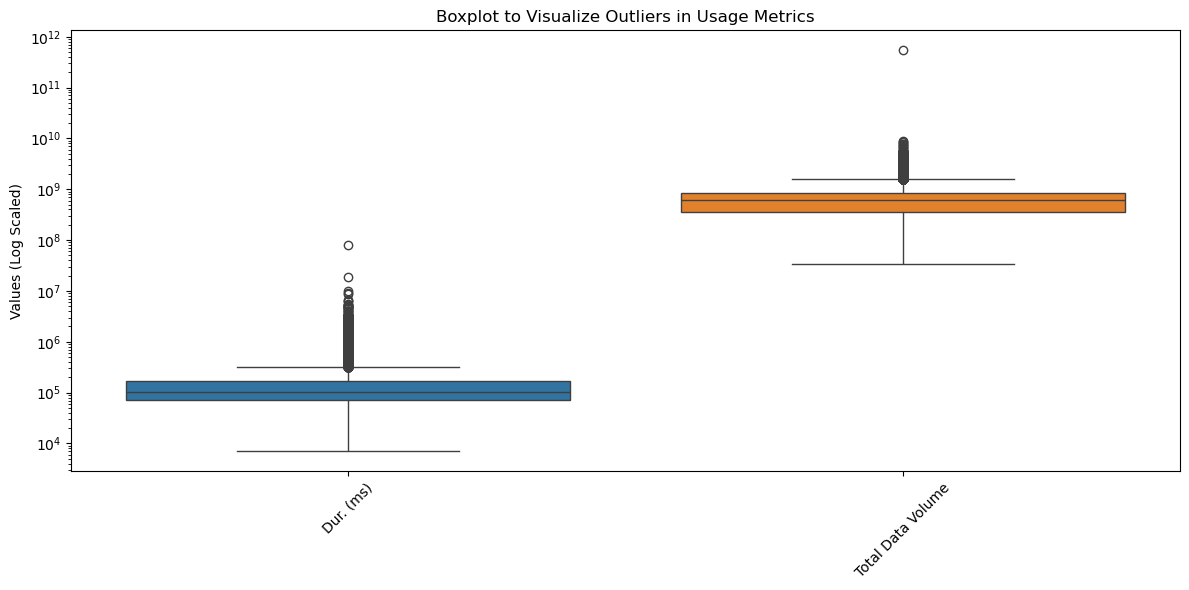

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=user_behaviour[['Dur. (ms)',  'Total Data Volume']])
plt.title('Boxplot to Visualize Outliers in Usage Metrics')
plt.ylabel('Values (Log Scaled)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
# Interpretation #
# Log Scale Makes Outliers Visible #
# 'Dur. (ms)' (Session Duration)
#The box represents the interquartile range (IQR) – 25th to 75th percentile
#'Total Data Volume'
#Also shows a right-skewed distribution.
#A few users consume disproportionately high amounts of data.
#Both metrics show significant variability.
# Users' behavior isn’t uniform — you have light casual users and heavy data/session consumers.



In [56]:
                                      #Stacked Bar Chart of Application Usage per User #

In [57]:
app_cols = [
    "Total_data DL+UL", "Social_Media DL+UL","Google_data DL+UL","Email_data DL+UL","Youtube_data DL+UL","Netflix_data DL+UL",
    "Gaming_data DL+UL","Other_data DL+UL"]

# Select top 10 users by total data volume #
top10_users = user_behaviour.nlargest(10, 'Total Data Volume').set_index('MSISDN/Number')

app_usage = top10_users[app_cols]




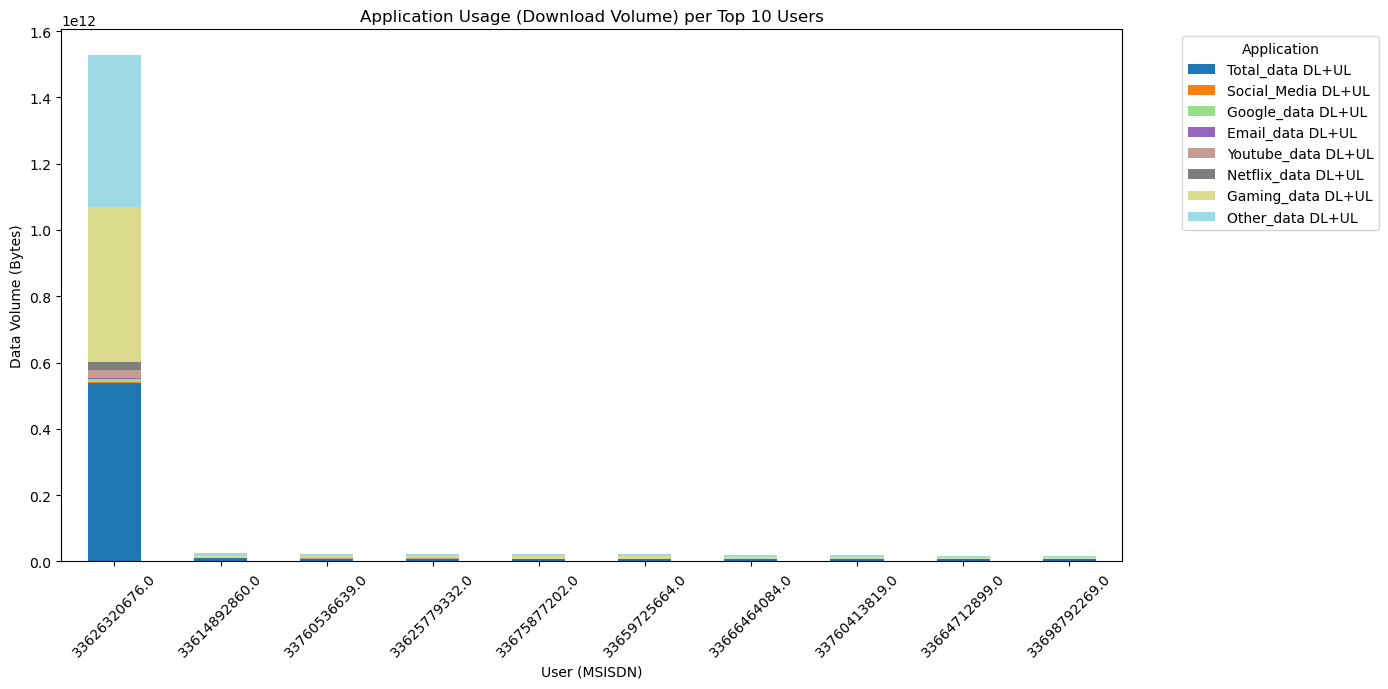

In [58]:
# Plot #
app_usage.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Application Usage (Download Volume) per Top 10 Users')
plt.xlabel('User (MSISDN)')
plt.ylabel('Data Volume (Bytes)')
plt.xticks(rotation=45)
plt.legend(title='Application', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [59]:
#Interpretation #
#Total Usage Comparison
#Each bar represents a user, and its total height shows that user’s total data consumption.
#We’re seeing the heaviest users in the entire dataset, and some use substantially more data than others, even among the top 10.
#The colored segments inside each bar show how much data was used per application
#Social Media, YouTube, and Netflix typically take up large portions — these are data-heavy apps.
#chart shows that while two users may have similar total data usage, their application preferences can be very different.


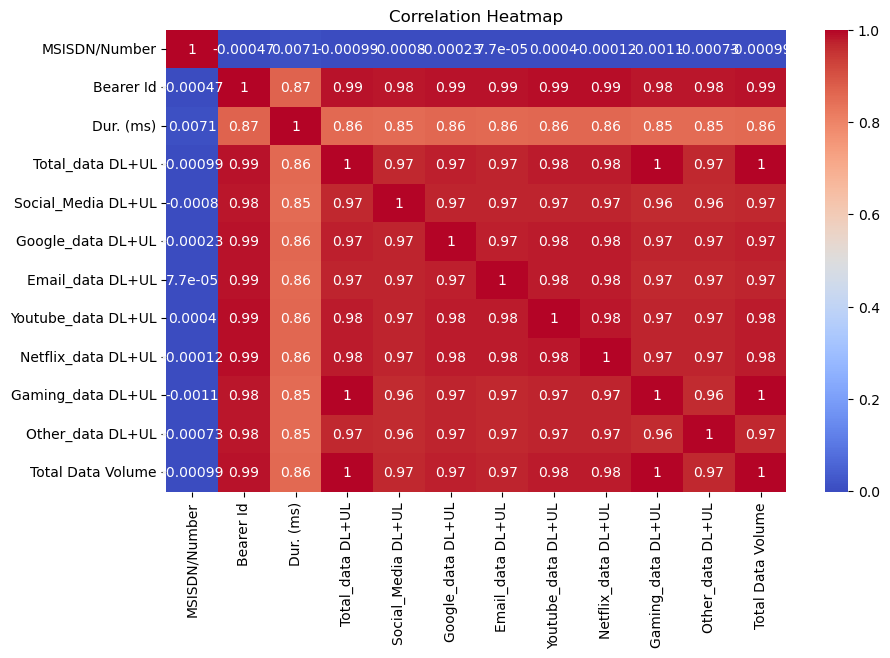

In [60]:
                                                       # Correlation heatmap #
corr_matrix = user_behaviour.corr()  
plt.figure(figsize=(10, 6))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")  
plt.title("Correlation Heatmap")  
plt.show()

In [61]:
#interpreatation #
#Total Data Volume and app-specific usage columns (e.g., YouTube, Netflix, Social Media, etc.)
#the more an app is used, the more it contributes to total data volume.
#YouTube, Netflix, and Social Media likely have the highest correlation with total data volume 

In [62]:
                                                     # principal component analysis # 
# Select only numeric columns relevant to user behaviour #
X = user_behaviour.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



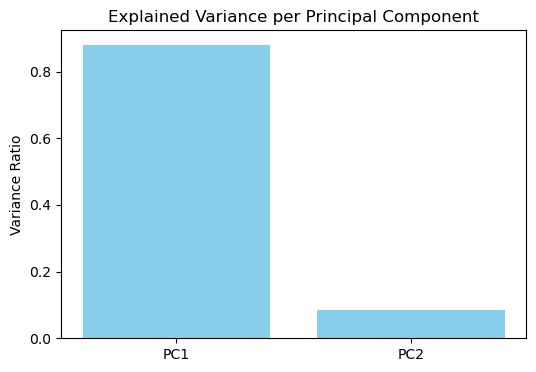

Cumulative Explained Variance: 0.9632360896995089


In [63]:
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.bar(['PC1', 'PC2'], explained_var, color='skyblue')
plt.title('Explained Variance per Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

print("Cumulative Explained Variance:", explained_var.sum())


In [64]:
# interpratation #
# The height of each bar represents how much of the total data variance is captured by that component.
#Key Observations
#PC1 > PC2
#PC1 explains the majority of the variance. 
#PC2 explains a smaller portion
#PC2 captures the next most significant pattern, but its contribution is less impactful than PC1.



In [65]:
                                     # Task2 - User Engagement Analysis # 

In [66]:
 #  Measure user engagement based on session frequency, duration, and session total traffic # 

In [67]:
#  Aggregate User Engagement Metrics #

#Total session frequency
#Total session duration
#Total traffic (Download + Upload in Bytes)

In [68]:
# Aggregate engagement metrics per user # 
user_engagement = user_data.groupby("MSISDN/Number").agg({
    "Bearer Id": "count",  # session frequency
    "Dur. (ms)": "sum",   # total session duration
    "Total_data DL+UL": "sum", # total traffic
    
}).reset_index()


In [69]:
user_engagement

,MSISDN/Number,Bearer Id,Dur. (ms),Total_data DL+UL
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09
...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08
106852,3.379000e+10,1,140988.0,4.803073e+08
106853,3.197021e+12,1,877385.0,2.321240e+08
106854,3.370000e+14,1,253030.0,5.962878e+08


In [70]:
# Save results #
user_engagement.to_csv("user_engagement.csv", index=False)
print(user_engagement.head())

   MSISDN/Number  Bearer Id  Dur. (ms)  Total_data DL+UL
0   3.360100e+10          1   116720.0      8.786906e+08
1   3.360100e+10          1   181230.0      1.568596e+08
2   3.360100e+10          1   134969.0      5.959665e+08
3   3.360101e+10          1    49878.0      4.223207e+08
4   3.360101e+10          2    37104.0      1.457411e+09


In [71]:
#  Identify the Top 10 Engaged Users per Metric #

# Top 10 users with the most sessions
#Top 10 users with the longest session duration
#Top 10 users with the highest total traffic


In [72]:
# Top 10 users per engagement metric
top_10_sessions = user_engagement.nlargest(10, "Bearer Id")
top_10_duration = user_engagement.nlargest(10, "Dur. (ms)")
top_10_traffic = user_engagement.nlargest(10, "Total_data DL+UL")

In [73]:
print("Top 10 Users by Sessions:\n", top_10_sessions)
print("Top 10 Users by Session Duration:\n", top_10_duration)
print("Top 10 Users by Total Traffic:\n", top_10_traffic)

Top 10 Users by Sessions:
        MSISDN/Number  Bearer Id   Dur. (ms)  Total_data DL+UL
13526   3.362632e+10       1084  81324722.0      5.393136e+11
6437    3.361489e+10         17   9966898.0      8.846226e+09
13180   3.362578e+10         17  18553754.0      8.499621e+09
37052   3.365973e+10         16   4035428.0      7.705863e+09
76363   3.367588e+10         15   4865947.0      7.891111e+09
92923   3.376054e+10         15   9279434.0      8.514774e+09
65118   3.366716e+10         13   8744914.0      5.618394e+09
666     3.360313e+10         12   6287761.0      4.976195e+09
1279    3.360452e+10         12   5207990.0      5.487855e+09
13994   3.362708e+10         12   4703516.0      5.754731e+09
Top 10 Users by Session Duration:
        MSISDN/Number  Bearer Id   Dur. (ms)  Total_data DL+UL
13526   3.362632e+10       1084  81324722.0      5.393136e+11
13180   3.362578e+10         17  18553754.0      8.499621e+09
6437    3.361489e+10         17   9966898.0      8.846226e+09
92923   

In [74]:

# Normalize Data & Perform K-Means Clustering #
# Cluster users based on engagement levels # 

#Normalize the engagement metrics #
#apply  K-Means Clustering (k=3)


In [75]:
# Select relevant features for clustering #
features = ["Bearer Id", "Dur. (ms)", "Total_data DL+UL"]
scaler = StandardScaler()
user_engagement_scaled = scaler.fit_transform(user_engagement[features])


In [76]:
# Find the optimal k using Elbow Method #
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_engagement_scaled)
    inertia.append(kmeans.inertia_)

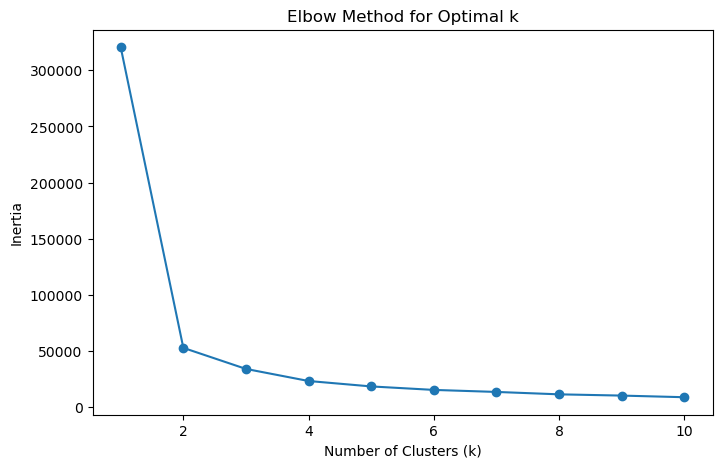

In [77]:

# Plot Elbow Method #
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [78]:
#Optimal k = 3 (based on elbow point)
# means 3 clusters are a good fit for segmenting your users based on engagement.
#Cluster 0: Low engagement
#Cluster 1: Medium engagement
#Cluster 2: High engagement

In [79]:
# Run K-Means with k=3 and analyze engagement clusters #
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement["Engagement Cluster"] = kmeans.fit_predict(user_engagement_scaled)

In [80]:
# cluster statistics #
cluster_summary = user_engagement.groupby("Engagement Cluster").agg({
    "Bearer Id": ["min", "max", "mean", "sum"],
    "Dur. (ms)": ["min", "max", "mean", "sum"],
    "Total_data DL+UL": ["min", "max", "mean", "sum"]
})

print(cluster_summary)

                   Bearer Id                              Dur. (ms)  \
                         min   max         mean     sum         min   
Engagement Cluster                                                    
0                          1     4     1.224932  119889      7142.0   
1                       1084  1084  1084.000000    1084  81324722.0   
2                          1    17     3.232157   29028     89973.0   

                                                           Total_data DL+UL  \
                           max          mean           sum              min   
Engagement Cluster                                                            
0                     447825.0  1.136535e+05  1.112372e+10     3.324901e+07   
1                   81324722.0  8.132472e+07  8.132472e+07     5.393136e+11   
2                   18553754.0  4.995350e+05  4.486323e+09     5.714004e+07   

                                                              
                             max   

In [81]:
 # Low engagement users (few sessions, low duration, low traffic)
 # Moderate engagement users
 # Highly engaged users (frequent sessions, high duration, high traffic)



In [82]:
# Engagement per Application #
# Find the most engaged users per application # 

# Aggregate total traffic per application per user #
app_engagement = user_data.groupby("MSISDN/Number").agg({
    "Social_Media DL+UL": "sum",
    "Google_data DL+UL":"sum",
    "Email_data DL+UL":"sum",
    "Youtube_data DL+UL":"sum",
    "Netflix_data DL+UL":"sum",
    "Gaming_data DL+UL":"sum",
    "Other_data DL+UL":"sum",
}).reset_index()


In [83]:
app_engagement["Total Social Media Traffic"] = app_engagement["Social_Media DL+UL"] 
top_10_social_media = app_engagement.nlargest(10, "Total Social Media Traffic")

app_engagement["Total Youtube Traffic"] = app_engagement["Youtube_data DL+UL"]
top_10_youtube = app_engagement.nlargest(10, "Total Youtube Traffic")

app_engagement["Total Gaming Traffic"] = app_engagement["Gaming_data DL+UL"] 
top_10_gaming = app_engagement.nlargest(10, "Total Gaming Traffic")

In [84]:
print("Top 10 Users by Social Media Traffic:\n", top_10_social_media)
print("Top 10 Users by YouTube Traffic:\n", top_10_youtube)
print("Top 10 Users by Gaming Traffic:\n", top_10_gaming)


Top 10 Users by Social Media Traffic:
         MSISDN/Number  Social_Media DL+UL  Google_data DL+UL  \
13526    3.362632e+10        2.017192e+09       8.400769e+09   
92923    3.376054e+10        3.978319e+07       1.232231e+08   
37052    3.365973e+10        3.541236e+07       1.165163e+08   
6437     3.361489e+10        2.829454e+07       1.279738e+08   
13180    3.362578e+10        2.713550e+07       1.423079e+08   
65118    3.366716e+10        2.424785e+07       1.050327e+08   
106137   3.378632e+10        2.397492e+07       1.102545e+08   
70960    3.366907e+10        2.380083e+07       7.782468e+07   
666      3.360313e+10        2.307782e+07       8.692902e+07   
31331    3.365849e+10        2.300007e+07       7.643414e+07   

        Email_data DL+UL  Youtube_data DL+UL  Netflix_data DL+UL  \
13526       2.442299e+09        2.471521e+10        2.458230e+10   
92923       3.369377e+07        3.962892e+08        3.346433e+08   
37052       3.599979e+07        2.579911e+08        

In [85]:

# Calculate total usage per app #
app_cols = [ "Social_Media DL+UL", "Google_data DL+UL", "Email_data DL+UL", "Youtube_data DL+UL","Netflix_data DL+UL", "Gaming_data DL+UL",
    "Other_data DL+UL"]

app_totals = app_engagement[app_cols].sum().sort_values(ascending=False)
top3_apps = app_totals.head(3)


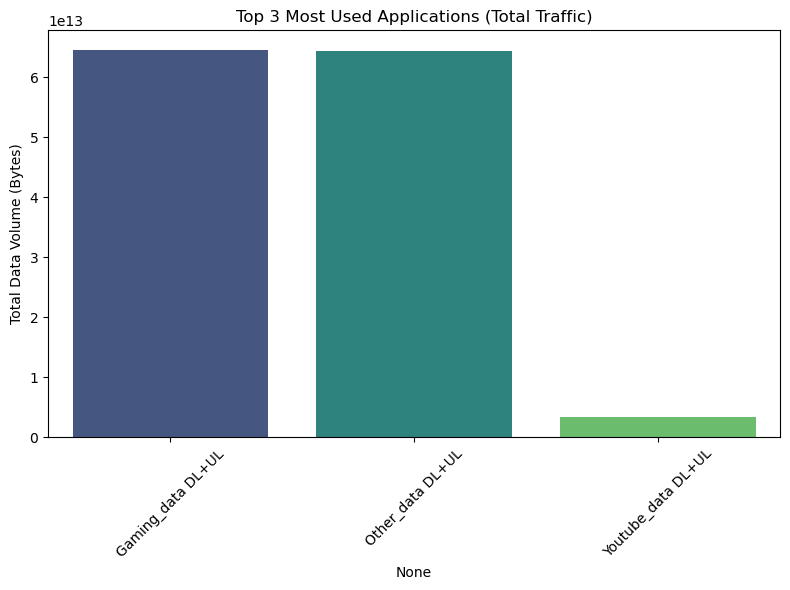

In [86]:
                                                   # Top 3 apps #
plt.figure(figsize=(8, 6))
sns.barplot(x=top3_apps.index, y=top3_apps.values,  hue=top3_apps.index, palette="viridis", legend=False)
plt.title("Top 3 Most Used Applications (Total Traffic)")
plt.ylabel("Total Data Volume (Bytes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [87]:
# interpretation #
#User Behaviour Insight#
# Apps like  Gaming ,YouTube, Netflix, and Social Media typically dominate traffic due to video content.
# apps  Gaming are on top, users are likely spending a lot of time engaging interactively.

In [88]:
                                           # Task - 3  User Experience Analysis #

In [89]:
  # Analyze user experience based on session failures, throughput, and network latency#



In [90]:

#Average TCP retransmission
#Average RTT 
#Handset type
#Average throughput

In [91]:


# Fill missing numeric values with mean #
numeric_cols = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Avg Bearer TP DL (kbps)'
,'Avg Bearer TP UL (kbps)']
for col in numeric_cols:
    user_data[col] = user_data[col].fillna(user_data[col].mean())

# Fill missing categorical values with mode
user_data['Handset Type'] = user_data['Handset Type'].fillna(user_data['Handset Type'].mode()[0])

# Outlier treatment: Replace values outside 1.5*IQR with mean
def replace_outliers(col):
    Q1 = user_data[col].quantile(0.25)
    Q3 = user_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_val = user_data[col].mean()
    user_data[col] = np.where((user_data[col] < lower_bound) | (user_data[col] > upper_bound), mean_val, user_data[col])

for col in numeric_cols:
    replace_outliers(col)

# Aggregate per customer
user_exp = user_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)':'mean',
    'TCP UL Retrans. Vol (Bytes)':'mean',
    'Avg RTT DL (ms)':'mean',
    'Avg RTT UL (ms)':'mean',
    'Avg Bearer TP DL (kbps)':'mean',
    'Avg Bearer TP UL (kbps)':'mean',
    'Handset Type': lambda x: x.mode().iloc[0]
}).reset_index()


In [92]:
user_exp

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.360100e+10,1.330000e+03,1330.000000,46.0,0.0,37.0,39.000000,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,1.330000e+03,1330.000000,30.0,1.0,48.0,51.000000,Apple iPhone 7 (A1778)
2,3.360100e+10,1.330000e+03,1330.000000,28.0,5.0,48.0,49.000000,undefined
3,3.360101e+10,1.066000e+03,1330.000000,69.0,15.0,204.0,44.000000,Apple iPhone 5S (A1457)
4,3.360101e+10,4.291685e+06,136190.270682,57.0,2.5,20197.5,905.208555,Apple iPhone Se (A1723)
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,2.150440e+05,3001.000000,42.0,10.0,9978.0,387.000000,Huawei Honor 9 Lite
106852,3.379000e+10,1.330000e+03,1330.000000,34.0,6.0,68.0,48.000000,Apple iPhone 8 Plus (A1897)
106853,3.197021e+12,1.330000e+03,1330.000000,28.0,5.0,1.0,0.000000,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,1.330000e+03,1330.000000,28.0,5.0,11.0,22.000000,Huawei B525S-23A


In [93]:
 #Compute & list 10 of the top, bottom, and most frequent #

In [94]:
def top_bottom_frequent_values(user_exp, col):
    top = user_exp[col].sort_values(ascending=False).dropna().unique()[:10]
    bottom = user_exp[col].sort_values().dropna().unique()[:10]
    freq = user_exp[col].value_counts().head(10).index.tolist()
    return top, bottom, freq

metrics = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Avg Bearer TP DL (kbps)'
,'Avg Bearer TP UL (kbps)']
results = {}

for metric in metrics:
    top, bottom, freq = top_bottom_frequent_values(user_exp, metric)
    results[metric] = {'Top 10': top, 'Bottom 10': bottom, 'Most Frequent 10': freq}


In [95]:
results[metric]

{'Top 10': array([2729., 2728., 2727., 2726., 2725., 2724., 2723., 2722., 2721.,
        2720.]),
 'Bottom 10': array([0.        , 1.        , 1.5       , 2.        , 2.66666667,
        2.75      , 3.        , 3.33333333, 3.5       , 3.6       ]),
 'Most Frequent 10': [1770.4171105525963,
  40.0,
  54.0,
  47.0,
  9.0,
  53.0,
  51.0,
  52.0,
  44.0,
  46.0]}

In [96]:
# Adding Columns in dataframe and creating new one For final interpretation # 

In [97]:
print(user_exp.dtypes)

MSISDN/Number                  float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
Handset Type                    object
dtype: object


In [98]:

user_exp['throughput'] = user_exp['Avg Bearer TP DL (kbps)'] + user_exp['Avg Bearer TP UL (kbps)']
user_exp['tcp_retransmission'] = user_exp['TCP DL Retrans. Vol (Bytes)']+user_exp['TCP UL Retrans. Vol (Bytes)']
user_exp['rtt']= user_exp['Avg RTT DL (ms)']+user_exp['Avg RTT UL (ms)']


print(user_exp)

        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0        3.360100e+10                 1.330000e+03   
1        3.360100e+10                 1.330000e+03   
2        3.360100e+10                 1.330000e+03   
3        3.360101e+10                 1.066000e+03   
4        3.360101e+10                 4.291685e+06   
...               ...                          ...   
106851   3.379000e+10                 2.150440e+05   
106852   3.379000e+10                 1.330000e+03   
106853   3.197021e+12                 1.330000e+03   
106854   3.370000e+14                 1.330000e+03   
106855   8.823971e+14                 1.330000e+03   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                       1330.000000             46.0              0.0   
1                       1330.000000             30.0              1.0   
2                       1330.000000             28.0              5.0   
3                       1330.000000             69.0       

In [99]:
# Average Throughput per Handset Type #

In [100]:
throughput_by_handset = user_exp.groupby('Handset Type')['throughput'].mean().sort_values(ascending=False)



In [101]:
throughput_by_handset

Handset Type
Xiaomi Communica. M1803E1A            50942.417111
Xiaomi Communica. Redmi Note 2        49381.000000
Huawei Nova 2I Huawei Mate 10 Lite    47661.000000
Htc 2Q6E100                           47493.000000
Lephone U Pro                         45669.000000
                                          ...     
Test IMEI                                 2.000000
Quectel Wireless. Quectel Ec21-E          2.000000
Quectel Wireless. Quectel Ec25-E          1.000000
Wct Uno                                   0.000000
Lg Lg-T385                                0.000000
Name: throughput, Length: 1394, dtype: float64

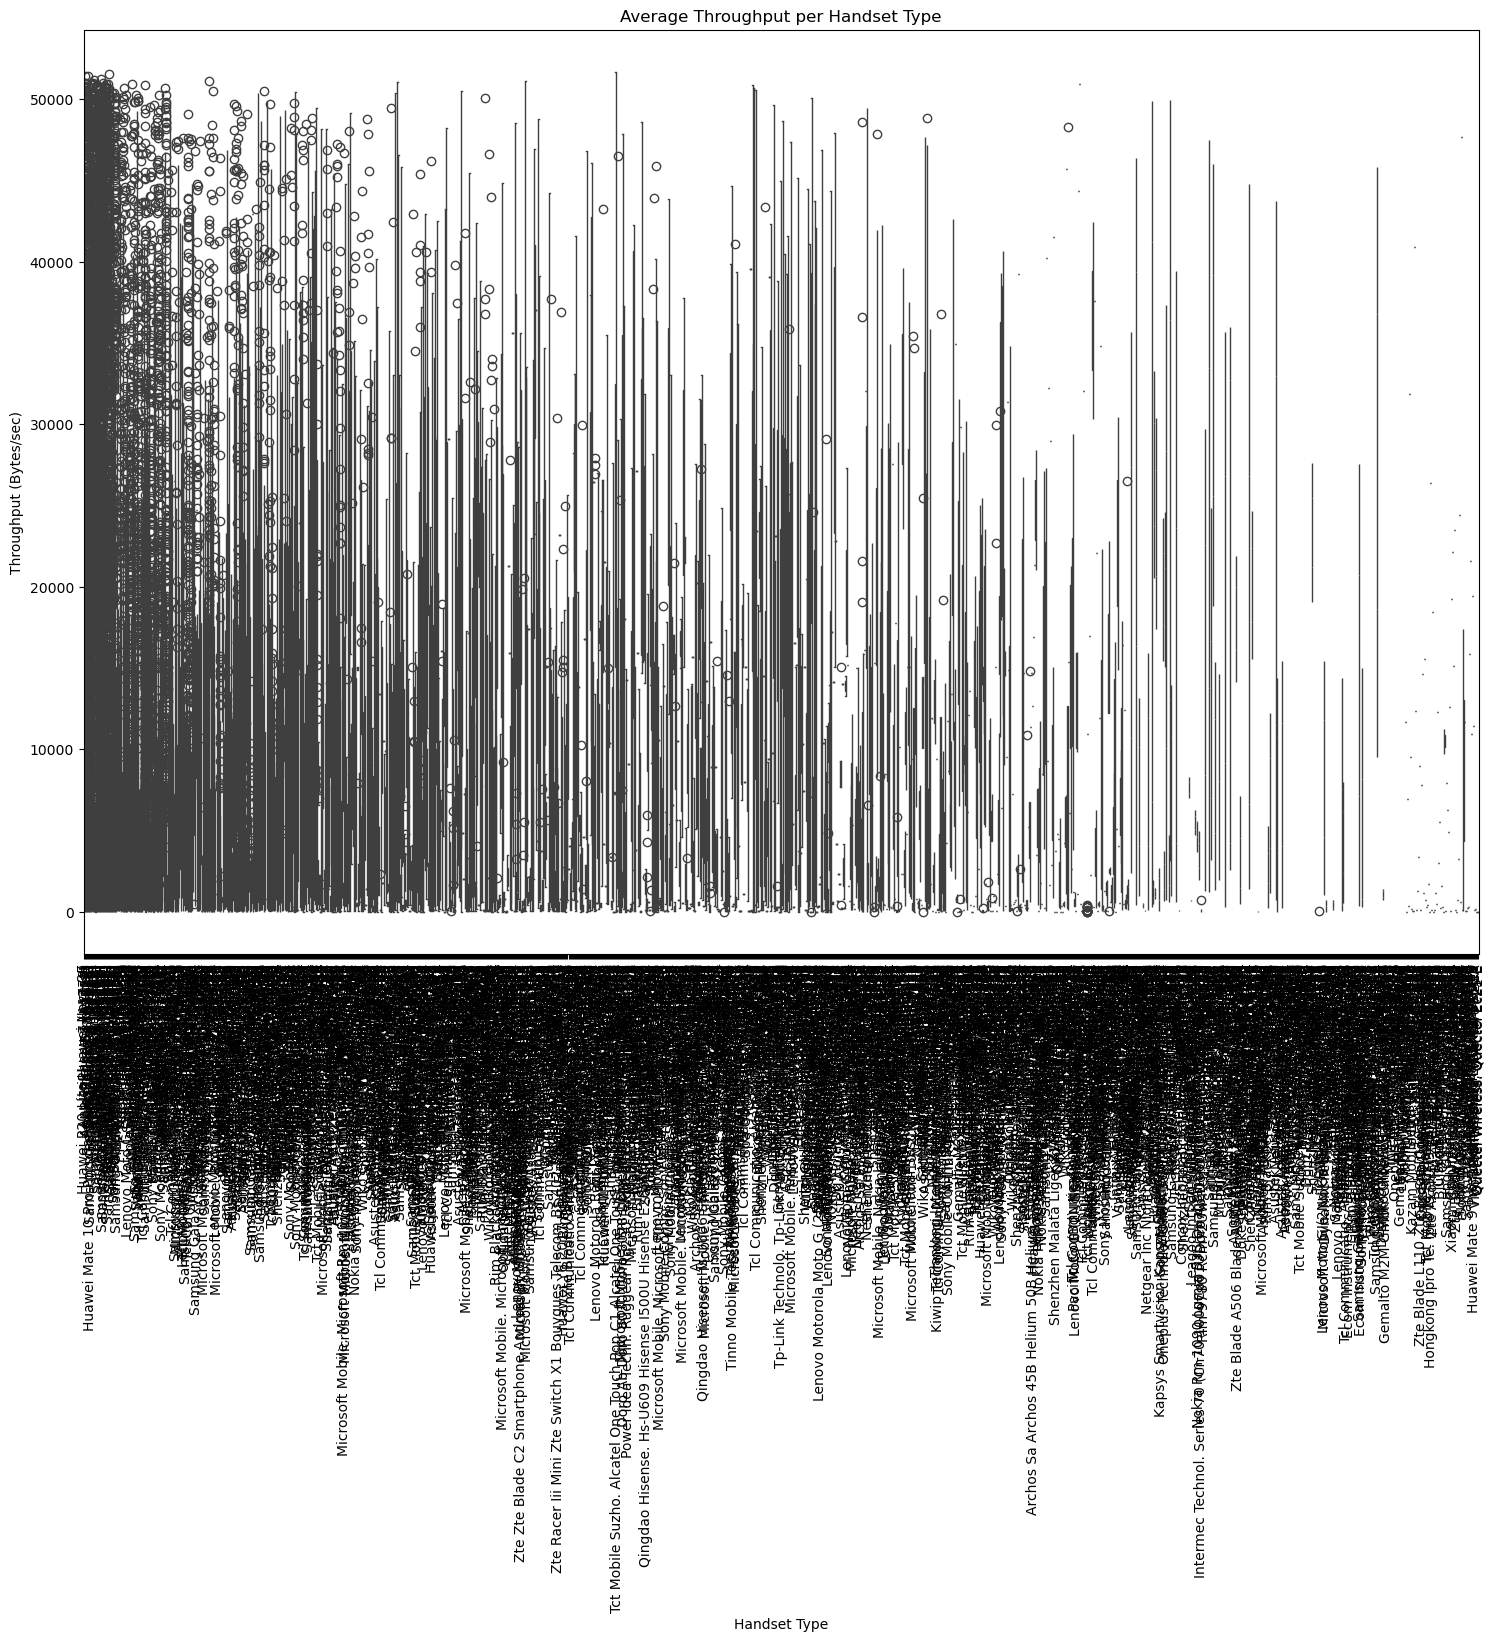

In [102]:
                                         # Distribution of average throughput#

plt.figure(figsize=(18, 12))
sns.boxplot(data=user_exp, x='Handset Type', y='throughput')
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type')
plt.ylabel('Throughput (Bytes/sec)')
plt.show()

In [103]:
#Interpretation #
#The plot shows how throughput (download/upload speed) varies across different handset types.
#Some handset types show higher median throughput, suggesting better performance or compatibility with high-speed networks.
#Handsets with taller boxes and higher medians likely offer superior network experience.

In [104]:
                                      # Average TCP Retransmission per Handset Type #

In [105]:
tcp_by_handset = user_exp.groupby('Handset Type')['tcp_retransmission'].mean().sort_values()




In [106]:
tcp_by_handset

Handset Type
Casper Bilgisaya. Via M1                         3.600000e+02
Samsung Galaxy Note 8 (Sm-N9500)                 4.180000e+02
Gemalto M2M Gmbh Cinterion Ehs5-E                1.342000e+03
Shenzhen Malata Liger 81G Smb-E1002 Smb-E8001    1.365000e+03
Microsoft Mobile. Rm-1062 Lumia 640 Xl Lte       1.375000e+03
                                                     ...     
Tinno Mobile Tec. Tinno S9091B                   8.853090e+06
Tinno Mobile Tec. Tinno S9111                    8.853090e+06
Oppo Cph1729                                     8.853090e+06
Huawei Frd-Al10                                  8.853090e+06
Asustek Asus Zb500Tl                             8.853090e+06
Name: tcp_retransmission, Length: 1394, dtype: float64

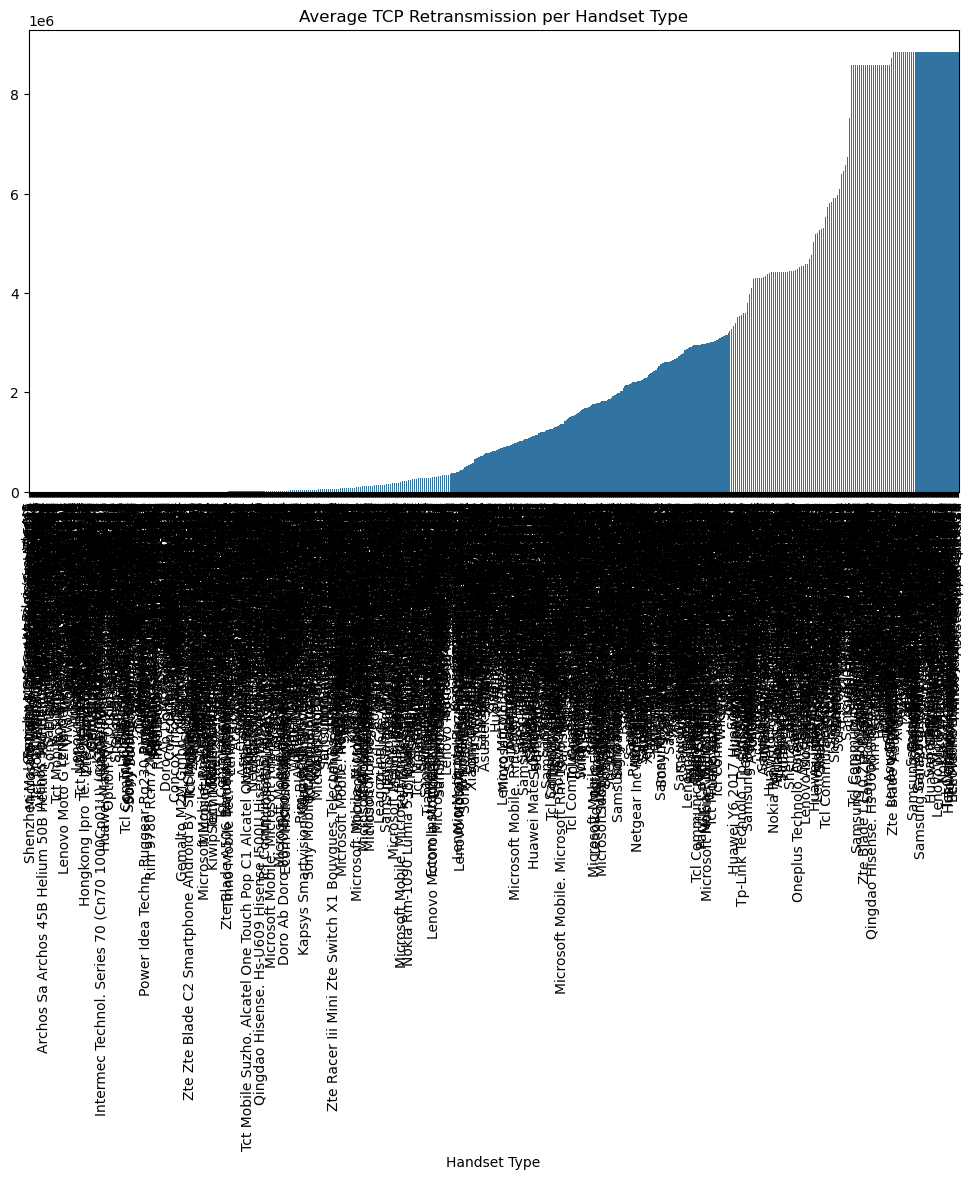

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tcp_by_handset.index, y=tcp_by_handset.values)
plt.xticks(rotation=90)
plt.title("Average TCP Retransmission per Handset Type")
plt.show()

In [108]:
#Interpretation of the Barplot #
#Performance Differences by Devices
#Some handset types show notably higher average retransmission rates, suggesting,Poor signal reception capability
#Others show lower retransmission averages, indicating stable and reliable network performance with those devices.


In [109]:
                                                  # K-Means Clustering (k=3)#

In [110]:

features = user_exp[['tcp_retransmission', 'rtt','throughput']]

# Normalize # 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering # 
kmeans = KMeans(n_clusters=3, random_state=42)
user_exp['experience_cluster'] = kmeans.fit_predict(scaled_features)


In [111]:
user_exp['experience_cluster']

0         1
1         1
2         1
3         2
4         2
         ..
106851    2
106852    1
106853    1
106854    1
106855    1
Name: experience_cluster, Length: 106856, dtype: int32

In [112]:
cluster_summary = user_exp.groupby('experience_cluster')[['tcp_retransmission', 'rtt','throughput']].agg(['mean', 'min', 'max', 'sum'])
print(cluster_summary)


                   tcp_retransmission                               \
                                 mean            min           max   
experience_cluster                                                   
0                        8.534630e+06  596520.541363  8.853090e+06   
1                        1.352136e+05     134.000000  8.853090e+06   
2                        7.546448e+05      97.000000  6.099472e+06   

                                        rtt                             \
                             sum       mean   min    max           sum   
experience_cluster                                                       
0                   1.507386e+11  87.068637  21.0  136.0  1.537806e+06   
1                   8.663677e+09  37.226973   0.0   67.0  2.385281e+06   
2                   1.895668e+10  72.729368  19.0  133.0  1.826962e+06   

                      throughput                                
                            mean    min      max           sum  
expe

In [113]:

# Cluster 0: High RTT, High Retransmission, Low Throughput → Poor experience
# Cluster 1: Moderate RTT and Retransmission, Moderate Throughput → Average experience
# Cluster 2: Low RTT, Low Retransmission, High Throughput → Best experience

In [114]:
                                        # Task 4 - Satisfaction Analysis # 

In [115]:
#  Predicting User Satisfaction # 
#  Machine Learning model to predict user satisfaction using experience, engagement, and behavioral features #
# Define the Target Variable (Satisfaction Score) # 

#User experience metrics (throughput, RTT, TCP Retransmission)
# Engagement levels (Total Data Used, Session Duration)
# Clustering output (Best , Average, Poor Experience)





In [116]:
# assigning a satisfaction score # 

  # A Satisfaction Score as 1 (Satisfied) or 0 (Not Satisfied) # 

  # If a user is in the "Good Experience" cluster → Satisfied (1)

  #If a user is in the "Poor Experience" cluster → Not Satisfied (0)

  #Middle users (Average) → Can be assigned based on a threshold

In [117]:

#  Compute engagement & experience scores
# Use scaled features from Task 2 & Task 3
engagement_data = user_engagement_scaled.copy()  # scaled features used for engagement clustering
experience_data = scaled_features .copy()  # scaled features used for experience clustering


In [118]:

kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(user_engagement)



In [119]:
# Get least engaged cluster center (lowest total mean engagement)
less_engaged_cluster = user_engagement.groupby('Engagement Cluster').mean().sum(axis=1).idxmin()
less_engaged_center = kmeans_engagement.cluster_centers_[less_engaged_cluster]

In [120]:
# Get center of least engaged cluster
least_engaged_cluster = user_engagement['Engagement Cluster'].value_counts().idxmin()
least_engaged_center = kmeans_engagement.cluster_centers_[least_engaged_cluster]



In [121]:
numeric_cols_exp = user_exp.select_dtypes(include=[np.number]).columns.tolist()
experience_cluster_means = user_exp.groupby('experience_cluster')[numeric_cols_exp].mean()



In [122]:
# Define User exp k means # 

user_exp_kmeans = KMeans(n_clusters=3, random_state=42)
user_exp['experience_cluster'] = user_exp_kmeans.fit_predict(scaled_features)


In [123]:

# Get worst experience cluster center #
worst_experience_cluster = experience_cluster_means.sum(axis=1).idxmin()
worst_experience_center = user_exp_kmeans.cluster_centers_[worst_experience_cluster]

In [124]:
# Calculate Euclidean distances to cluster centers #
user_engagement['engagement_score'] = np.linalg.norm(user_engagement_scaled - least_engaged_cluster, axis=1)
user_exp['experience_score'] = np.linalg.norm(scaled_features - worst_experience_cluster , axis=1)


In [125]:

# Merge the two DataFrames on MSISDN #
satisfaction_df = user_engagement[['MSISDN/Number', 'engagement_score']].merge(
    user_exp[['MSISDN/Number', 'experience_score']], on='MSISDN/Number')

# Compute Satisfaction Score
satisfaction_df['satisfaction_score'] = (satisfaction_df['engagement_score'] + satisfaction_df['experience_score']) / 2

# Show Top 10 Most Satisfied Users #
top_satisfied_users = satisfaction_df.sort_values(by='satisfaction_score', ascending=False).head(10)
print(" Top 10 satisfied users")

 Top 10 satisfied users


In [126]:
satisfaction_df

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,1.803863,4.315384,3.059624
1,3.360100e+10,1.940744,4.642436,3.291590
2,3.360100e+10,1.857126,4.596044,3.226585
3,3.360101e+10,2.078406,3.741566,2.909986
4,3.360101e+10,1.681184,2.276727,1.978955
...,...,...,...,...
106851,3.379000e+10,2.078664,3.658115,2.868389
106852,3.379000e+10,1.885680,4.438750,3.162215
106853,3.197021e+12,2.171862,4.600819,3.386341
106854,3.370000e+14,1.673795,4.599227,3.136511


In [127]:
top_satisfied_users

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
13526,3.362632e+10,515.880426,2.893108,259.386767
13180,3.362578e+10,58.716853,4.084693,31.400773
6437,3.361489e+10,31.176152,3.757580,17.466866
92923,3.376054e+10,28.896242,3.587969,16.242106
65118,3.366716e+10,26.965465,3.735104,15.350284
57160,3.366469e+10,18.989150,4.596773,11.792961
50281,3.366284e+10,19.965336,1.979759,10.972548
666,3.360313e+10,19.026723,2.885573,10.956148
66029,3.366746e+10,16.792696,4.440576,10.616636
34781,3.365922e+10,15.758936,3.328446,9.543691


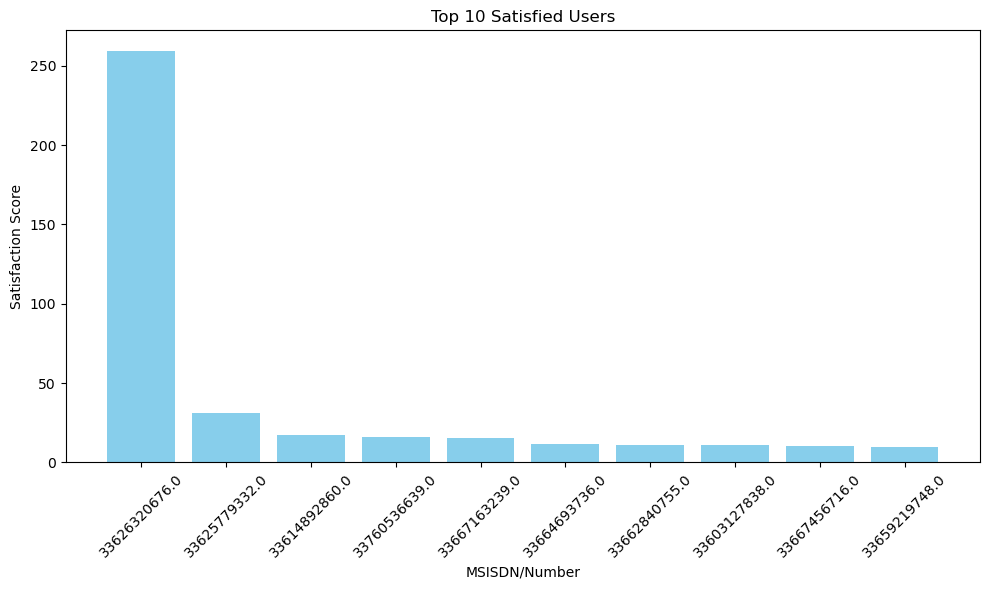

In [128]:
# Plot the top 10 satisfied users #
plt.figure(figsize=(10, 6))
plt.bar(top_satisfied_users['MSISDN/Number'].astype(str), top_satisfied_users['satisfaction_score'], color='skyblue')
plt.xlabel('MSISDN/Number')
plt.ylabel('Satisfaction Score')
plt.title('Top 10 Satisfied Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [129]:
                                                  # linear regression Model #

In [130]:
                                                
# Define features and target variable #

In [131]:

X = satisfaction_df[['engagement_score', 'experience_score']]
y = satisfaction_df['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [132]:
# Initialize and train the regression model #
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [133]:
# Predict satisfaction scores for the test set
y_pred = model.predict(X_test)

# Evaluate the model #
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 5.269751790169724e-30
R-squared: 1.0


In [134]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [135]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error:" ,rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 5.269751790169724e-30
Root Mean Squared Error: 2.295593995063091e-15
R² Score: 1.0


In [136]:
y_pred

array([3.27490312, 3.31907013, 3.32587213, ..., 2.43680601, 2.68774142,
       1.80590507])

In [137]:
print(satisfaction_df[['engagement_score', 'experience_score', 'satisfaction_score']].corr())


                    engagement_score  experience_score  satisfaction_score
engagement_score            1.000000          0.012027            0.824829
experience_score            0.012027          1.000000            0.575261
satisfaction_score          0.824829          0.575261            1.000000


In [138]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression with an alpha parameter
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'Ridge R² Score: {r2_score(y_test, y_pred_ridge)}')


Ridge Mean Squared Error: 2.7362969660980974e-11
Ridge R² Score: 0.9999999999291401


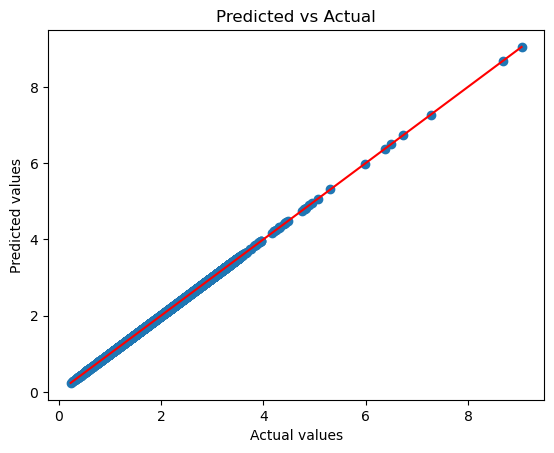

In [139]:
# Predicted vs Actual plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()

In [140]:
# Save the model#
joblib.dump(model,'model.pkl')

['model.pkl']

In [141]:
                                          # Random Forest Model # 

In [142]:
# Define the feature columns and target column
X = satisfaction_df[['engagement_score', 'experience_score']] 
y = satisfaction_df['satisfaction_score'] 


In [143]:
# Split the data into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
# Scale the features using StandardScaler #
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
# Initialize and train the Random Forest Regressor #
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [146]:
# Make predictions #
y_pred = rf_model.predict(X_test_scaled)



In [147]:
y_pred

array([3.27368652, 3.31866634, 3.32589705, ..., 2.43527978, 2.68781235,
       1.8073058 ])

In [148]:
# Evaluate the model #
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics #
print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest Root Mean Squared Error: {rmse}")
print("R² Score:", r2)

Random Forest Mean Squared Error: 0.00034415203021477737
Random Forest Root Mean Squared Error: 0.018551334998182137
R² Score: 0.9991087747126508


In [149]:

# Save Random Forest model #
joblib.dump(rf_model, 'random_forest_model.pkl')



['random_forest_model.pkl']

In [150]:
# Get feature importances #
importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")


engagement_score: 0.526744462996262
experience_score: 0.473255537003738


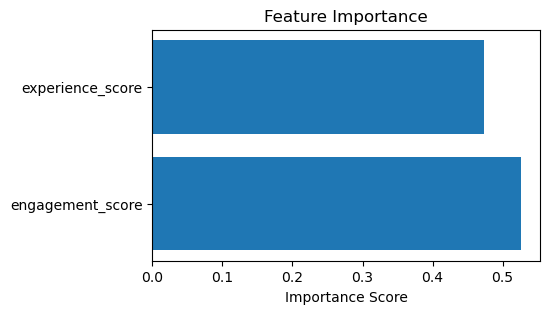

In [151]:

feature_importances = rf_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(5,3))
plt.barh(features, feature_importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()

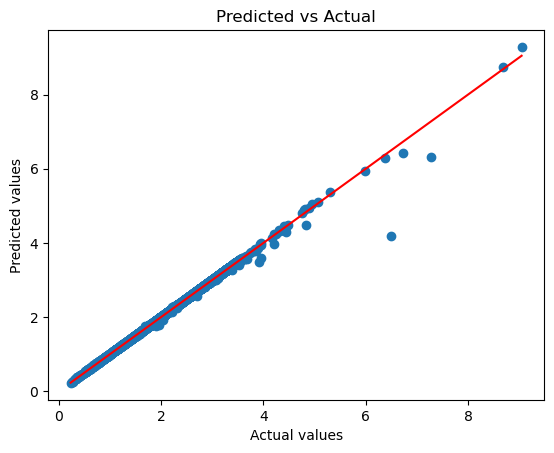

In [152]:
# Predicted vs Actual plot #
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()

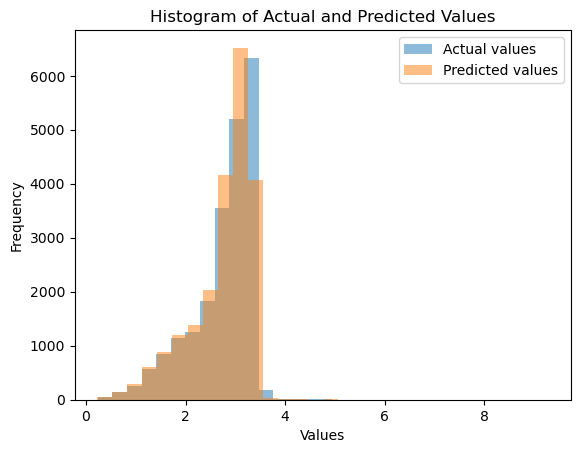

In [153]:
# Histograms # 
plt.hist(y_test, bins=30, alpha=0.5, label='Actual values')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual and Predicted Values')
plt.legend()
plt.show()

In [154]:
                                     # k-means (k=2) on the engagement & the experience score#

In [155]:
# Using engagement and experience scores for clustering #
X = satisfaction_df[['engagement_score', 'experience_score']]


In [156]:
# Fit KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_df['cluster'] = kmeans.fit_predict(X)

# Print the cluster centers to analyze them #
print(kmeans.cluster_centers_)



[[1.76751419 1.79636095]
 [1.82351467 4.22042823]]


In [157]:
# Check the distribution of clusters #
print(satisfaction_df['cluster'].value_counts())

cluster
1    83900
0    22956
Name: count, dtype: int64


In [158]:
# Aggregate the average satisfaction and experience scores by cluster #
cluster_summary = satisfaction_df.groupby('cluster')[['satisfaction_score', 'experience_score']].mean()
print(cluster_summary)


         satisfaction_score  experience_score
cluster                                      
0                  1.784154          1.800676
1                  3.022577          4.221617


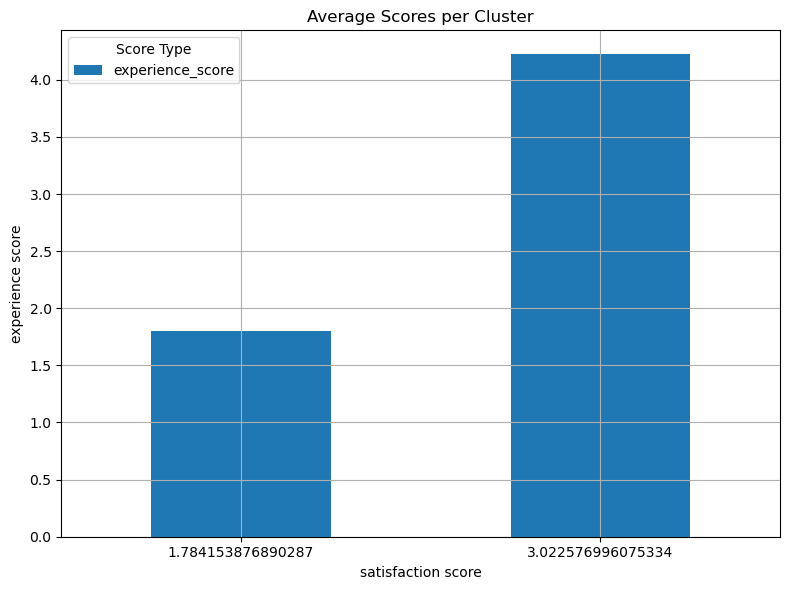

In [159]:


# Plot cluster summary #
cluster_summary.plot(x='satisfaction_score', kind='bar', figsize=(8, 6), rot=0)
plt.title('Average Scores per Cluster')
plt.xlabel('satisfaction score')
plt.ylabel('experience score')
plt.legend(title='Score Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [162]:
# mysql connector #

In [163]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [164]:

final_df = satisfaction_df[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']]


In [165]:
final_df

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,1.803863,4.315384,3.059624
1,3.360100e+10,1.940744,4.642436,3.291590
2,3.360100e+10,1.857126,4.596044,3.226585
3,3.360101e+10,2.078406,3.741566,2.909986
4,3.360101e+10,1.681184,2.276727,1.978955
...,...,...,...,...
106851,3.379000e+10,2.078664,3.658115,2.868389
106852,3.379000e+10,1.885680,4.438750,3.162215
106853,3.197021e+12,2.171862,4.600819,3.386341
106854,3.370000e+14,1.673795,4.599227,3.136511


In [166]:
# Save DataFrame to CSV file #
final_df.to_csv("satisfaction_scores.csv", index=False)


In [167]:
import mysql.connector

# Connect to your MySQL database #
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Hbk@1989',
    database='telecom_project'
)


cursor = conn.cursor()

# Create table if not exists
cursor.execute("""
    CREATE TABLE IF NOT EXISTS satisfaction_scores (
        `MSISDN/Number` VARCHAR(255),
        engagement_score FLOAT,
        experience_score FLOAT,
        satisfaction_score FLOAT
    )
""")

# Insert data row by row
for _, row in final_df.iterrows():
    cursor.execute("""
        INSERT INTO satisfaction_scores (`MSISDN/Number`, engagement_score, experience_score, satisfaction_score)
        VALUES (%s, %s, %s, %s)
    """, tuple(row))

# Commit the transaction and close the connection
conn.commit()
cursor.close()
conn.close()



In [168]:
# Reconnect to the database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Hbk@1989',
    database='telecom_project'
)

cursor = conn.cursor()

# Fetch and print some rows
cursor.execute("SELECT * FROM satisfaction_scores LIMIT 10;")
rows = cursor.fetchall()

for row in rows:
    print(row)

cursor.close()
conn.close()


('33601001722.0', 1.80386, 4.31538, 3.05962)
('33601001754.0', 1.94074, 4.64244, 3.29159)
('33601002511.0', 1.85713, 4.59604, 3.22659)
('33601007832.0', 2.07841, 3.74157, 2.90999)
('33601008617.0', 1.68118, 2.27673, 1.97896)
('33601010682.0', 1.48463, 4.52264, 3.00363)
('33601011634.0', 1.68888, 4.01856, 2.85372)
('33601011959.0', 2.03647, 4.13579, 3.08613)
('33601014694.0', 1.17646, 4.59617, 2.88631)
('33601020306.0', 1.83198, 4.02112, 2.92655)


In [169]:
                                            # Creating A Dasboard using Streamlit #

In [169]:

import streamlit as st
import requests

# Load Processed Data
final_df = pd.read_csv("satisfaction_scores.csv")

# Load Model
model = joblib.load("random_forest_model.pkl")

# Streamlit Dashboard
st.title("📊 User Analytics Dashboard - Telecom")

# Sidebar Navigation
menu = ["User Overview", "Engagement Analysis", "Experience Metrics", "Satisfaction Prediction"]
choice = st.sidebar.selectbox("Navigation", menu)

# 1️⃣ User Overview
if choice == "User Overview":
    st.subheader("📱 Top 10 Handsets Used")
    top_phones = user_data["Handset Type"].value_counts().head(10)
    st.bar_chart(top_phones)

    st.subheader("🏭 Top 3 Manufacturers")
    top_manufacturers = user_data["Handset Manufacturer"].value_counts().head(3)
    st.write(top_manufacturers)

# 2️⃣ Engagement Analysis
elif choice == "Engagement Analysis":
    st.subheader("📊 Engagement Metrics")
    
    fig, ax = plt.subplots()
    sns.histplot(user_data["Engagement Score"], kde=True, ax=ax)
    st.pyplot(fig)

    st.write("📌 Top 10 Most Engaged Users")
    st.write(user_data.nlargest(10, "Engagement Score"))

# 3️⃣ Experience Metrics
elif choice == "Experience Metrics":
    st.subheader("📡 Network Performance Analysis")
    
    fig, ax = plt.subplots()
    sns.boxplot(x=user_data["Throughput"], ax=ax)
    st.pyplot(fig)

    st.write("📌 Top 10 Best User Experiences")
    st.write(user_data.nlargest(10, "Experience Score"))

# 4️⃣ Satisfaction Prediction
elif choice == "Satisfaction Prediction":
    st.subheader("🎯 Predict User Satisfaction")

    features = st.text_input("Enter User Features (comma-separated):")
    
    if st.button("Predict Satisfaction"):
        try:
            feature_list = [float(x) for x in features.split(",")]
            response = requests.post("http://127.0.0.1:5000/predict", json={"features": feature_list})
            result = response.json()
            st.success(f"Predicted Satisfaction Score: {result['satisfaction']}")
        except:
            st.error("⚠️ Please enter valid numbers!")






2025-04-21 13:29:28.837 
  command:

    streamlit run C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-21 13:29:28.841 Session state does not function when running a script without `streamlit run`


In [ ]:
# Project is finalised #